<a href="https://colab.research.google.com/github/wphall/CO2-Equilibrium/blob/main/Student_Notebook_CO2_Equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring the Connection Between Atmospheric Carbon Dioxide and Ocean Acidification through a Python Coding Exercise
### W. Paige Hall and Kevin Cantrell
In this coding activity you will explore the connection between atmospheric carbon dioxide and ocean acidity. The python script you create will allow you to determine the equilibrium concentrations of each chemical species in a system comprising carbon dioxide and water. Using the equilibrium concentration of $\mathrm{H^+}$, you will calculate aqueous pH and create a plot that demonstrates its dependence on the atmospheric partial pressure of carbon dioxide. Throughout this activity, the code or text blocks that require student input will be color-coded in $\mathrm{\color{Red} {red}}$ $\mathrm{\color{Red}{text}}$.

# Part 0: A Primer for Solving Equilibrium Problems Using Python


If you are unfamiliar with Python or need a reminder about framing equilibrium calculations using charge and mass balance relationships,  you may want to complete this [self-guided exercise](https://colab.research.google.com/drive/1UyyLiq0b4od7nEySMXhpd4WJ78axGU_O?usp=sharing) before tackling this more complex problem with several equilibrium expressions.

# Part I: The Chemistry


As global concentrations of $\mathrm{CO_2}$ have risen sharply since the industrial revolution, the temperature of the the planet has also risen due to the enhanced greenhouse effect.  As an atmospheric gas that dissolves in and reacts with water, $\mathrm{CO_2}$ also has a strong influence on the pH of all water in contact with the atmosphere, including rainwater and seawater .  The oceans are the only permanent sink for $\mathrm{CO_2}$, and its presence tends to acidify them ([Zeebe, 2012](https://www.annualreviews.org/doi/abs/10.1146/annurev-earth-042711-105521)). Because many marine organisms form their exoskeletons at high pH via calcification, this process has been described as "the other $\mathrm{CO_2}$ problem," [“climate change's evil twin,” and “osteoporosis of the sea.”](https://www.fisheries.noaa.gov/insight/understanding-ocean-acidification)

In this lab we will develop an understanding of the fundamental reactions and chemistry that drive the inorganic chemistry of carbon in water.  In a closed system containing carbon dioxide gas and pure water at thermodynamic equilibrium, the following chemical reactions describe the speciation of carbon.

\begin{align}
\mathrm{ CO_{2 \, (g)}  }& \rightleftharpoons \mathrm{ CO_{2 \, (aq)} } \tag{1} \\
\mathrm{ CO_{2 \, (aq)} + H_2O_{(l)} }& \rightleftharpoons \mathrm{ H_2CO_{3 \, (aq)} } \tag{2}\\
\mathrm{ H_2CO_{3 \, (aq)}  }& \rightleftharpoons \mathrm{H^+_{ \, (aq)} + HCO_{3 \, (aq)}^- } \tag{3}\\
\mathrm{ HCO_{3 \, (aq)}^-  }& \rightleftharpoons \mathrm{H^+_{ \, (aq)} + CO_{3 \, (aq)}^{2-} } \tag{4}\\
\end{align}


By convention, equations 2 and 3 above are combined into a single equation with $\mathrm{CO^*_{2 \, (aq)}}$ representing both uncharged species. In a marine system, which is supersaturated with calcium carbonate, the following reaction will also influence carbon speciation.

\begin{align}
\mathrm{ CaCO_{3 \, (s)}  }& \rightleftharpoons \mathrm{Ca^{2+}_{ \, (aq)} + CO_{3 \, (aq)}^{2-} } \tag{5}\\
\end{align}

The chemical system is depicted schematically in Figure 1 below.


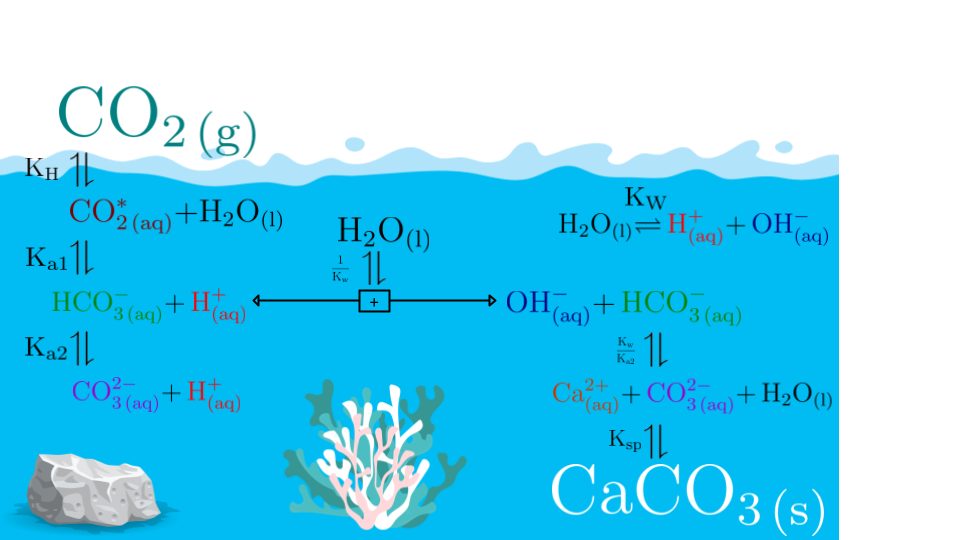

# Part II: Defining the System of Equations


##Aqueous Equilibrium Expressions

In a closed system containing only water and carbon dioxide at thermodynamic equilibrium with a temperature of $25^o$C the ionic strength of the solution will be low, and the activity coefficients can be assumed to be unity.  

Replacing equilibrium constants with their empirically determined values ([Dickson, 2010](https://www.pmel.noaa.gov/co2/files/dickson_thecarbondioxidesysteminseawater_equilibriumchemistryandmeasurementspp17-40.pdf)), activities with molar concentrations (M), and fugacities with partial pressures (atm), we can use equilibrium expressions to obtain numerical relationships between the seven variables:

\begin{align}\mathrm{
 {P_{CO_{2 \,(g)}}}, \;\;
 {[CO^{*}_{2 \,(aq)}]}, \;\;
 {[HCO^-_{3 \, (aq)}]}, \;\;
 {[CO^{2-}_{3 \, (aq)}]}, \;\;
 {[H^+_{(aq)}]}, \;\;
 {[OH^{-}_{(aq)}]}, \;\;
 and \;\;{[Ca^{2+}_{(aq)}]} \;\;
}\end{align}

In the markdown cell below, complete each of the equilibrium expressions. See [here for a guide to formatting text (markdown) cells](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk) in Colab and [here for more about formatting using LaTeX](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb).

Double click on this cell (or click the pencil icon in the upper right) and give it a try. The first expression has been completed for you. Note that text between the two "$" characters is interpreted as LaTeX which is a powerful formatting tool for science and mathematics.

LaTex vs $\LaTeX$

\begin{align}
\color{Red}{K_H=3.40 \times 10^{−2}} &\color{Red}{= \mathrm{\frac {[CO^{*}_{2 \,(aq)}]} {P_{CO_{2 \,(g)}}} }}\\
\color{Red}{K_{a1}=4.46 \times 10^{−7}} &\color{Red}{= }\\
\color{Red}{K_{a2}=4.69 \times 10^{−11}} &\color{Red}{= }\\
\color{Red}{K_w=1.00 \times 10^{−14}} &\color{Red}{= }\\
\color{Red}{K_{sp}=4.6 \times 10^{−9}} &\color{Red}{= }\\
\end{align}

##Charge Balance

In addition to our equilibrium expressions, we must also have an equation that describes the [charge balance in the system](https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)/Analytical_Sciences_Digital_Library/Courseware/Chemical_Equilibrium/02_Text/04_Mass_and_Charge_Balances). The charge balance equation is

$n_1[C_1] + n_2[C_2] +  ... m_1[A_1] + m_2[A_2] +  ...= 0$

Where, e.g., $[C_1]$ is the concentration of cation 1 and $n_1$ is the charge on cation 1, and $[A_1]$ is the concentration of anion 1 and $m_1$ is the charge on anion 1. This equation ensures that the overall charge in the system is zero. Write the charge balance equation for your aqueous system in the markdown cell below.

Double click on this cell and give it a try.  Calcium is already entered. Your task is to complete the rest of the equation by adding terms on the left hand side for every charged species in the system.

$ \mathrm{\color{Red}{2[Ca^{2+}]  = 0}}$

##Mass Balance


Another necessary equation is the mass balance equation. This equation ensures that the total amount of all forms of a given species in solution is equal to the amount of that species originally introduced to the solution. For example, consider the dissociation of phosphoric acid, $H_3PO_4$, which dissociates to $H_2PO_4^-$, $HPO_4^{2-}$, and $PO_4^{3-}$. If we call the initial concentration of phosphoric acid $[H_3PO_4]_{initial}$, then the mass balance equation can be written as

$[H_3PO_4]_{initial}=[H_3PO_4]_{final}+[H_2PO_4^{-}]+[HPO_4^{2-}]+[PO_4^{3-}]$

Where the right hand side of the equation represents the equilibrium concentration of each phosphate species.

In the three sets of markdown cells below, we will consider three possibilities for mass balance. In cell (I) we consider a system in which $\mathrm{CO_2(g)}$ is the only source of carbon and the system is closed (no new $\mathrm{CO_2(g)}$ can enter the atmosphere). This system is a good model for your experimental measurements.

In cell (II) we consider a system in which $\mathrm{CO_2(g)}$ can change. This system is a good model for the Earth, where new $\mathrm{CO_2(g)}$ can enter from anthropogenic emissions and natural processes.

In cell (III) we consider a system in which there is no initial $\mathrm{CO_2(g)}$ in the atmosphere, but the water contains saturated $\mathrm{CaCO_3(s)}$.


###Carbon Mass Balance

####(I) Closed System: $\mathrm{P_{CO_2}}$ gas is variable, total carbon is finite, limited dissolved inorganic carbon (DIC)



```
# This is formatted as code
```

Use equations 1 - 4 and/or Figure 1 above to consider the speciation of carbon after it dissolves in water. In the markdown cell below, write the mass balance equation for aqueous carbon asuming the system is closed and the intial partial pressure of $\mathrm{CO_2}$ is an upper limit for the amount of dissolved carbon.

$\color{Red}{[CO_2^*]_{initial} = P_{initial} \times K_H = }$

In the markdown cell below, write the mass balance equation for solid calcium carbonate in a saturated solution in which initial $\mathrm{P_{CO_{2 \,(g)}}}$= 0 (i.e. the only source of carbon in this system is $\mathrm{CaCO_3}$). The dissociation will produce $\mathrm{Ca^{2+}}$ and $\mathrm{CO_3^{2-}}$ ions in a 1-to-1 ratio.  All of the dissolved calcium atoms will exist as $\mathrm{Ca^{2+}}$ (there may also be ion pairs, but we will ignore them throught this calculation). The carbon atoms can react with water and form $\mathrm{CO_3^{2-}}$, $\mathrm{HCO_3^{-}}$,   $\mathrm{CO^*_{2 \, (aq)}}$, and even some $\mathrm{CO_{2 \, (g)}}$.

$\mathrm{\color{Red}{ [Ca^{2+}]= }} $

$LaTeX$ tip: The command "\mathrm{}" formats text inside the braces as $\mathrm{Roman}$ type rather than the default $italic$.


If the system is open, there is no upper limit on the amount of dissolved carbon.  In this case we replace the mass balance of carbon with an equation that fixes the partial pressure of $\mathrm{CO_2}$ to its initial value.

$\mathrm{P_{CO_{2 \,(g)}}final}=\mathrm{P_{CO_{2 \,(g)}}initial}$

Note that holding $\mathrm{P_{CO_{2 \,(g)}}}$ constant also forces $\mathrm{[CO_2^*]_{(aq)}}$ to remain constant due to Henry's Law.

$\mathrm{[CO_2^*]_{(aq)}}=\mathrm{P_{CO_{2 \,(g)}}\times K_H}$

##The Equations

We have seven unknowns:
$\mathrm{
 {P_{CO_{2 \,(g)}}},
 {[CO^{*}_{2 \,(aq)}]},
 {[HCO^-_{3 \, (aq)}]},
 {[CO^{2-}_{3 \, (aq)}]},
 {[H^+_{(aq)}]},
 {[OH^{-}_{(aq)}]},
 {[Ca^{2+}_{(aq)}]}
}$

Which requires that we have seven equations. These equations are: $K_H$, $K_{a1}$, $K_{a2}$, $K_W$, $K_{sp}$, charge balance, and mass balance.

Take your set of seven equations developed in the previous section and rearrange them so that
* They all equal zero
* They contain no division operations
* The numerical constants (K and $P_{initial}$) are subtracted at the end

In the markdown cell below, write the equations **in the order listed above** starting with Henry's Law. We will define these equations as f0 - f6.

You will refer to this guide as you begin coding to define the chemical system in Python.

### Solution

\begin{align}
\mathrm{\color{Red}{f0= }}\\
\mathrm{\color{Red}{f1= }}\\
\mathrm{\color{Red}{f2= }}\\
\mathrm{\color{Red}{f3= }}\\
\mathrm{\color{Red}{f4= }}\\
\mathrm{\color{Red}{f5= }}\\
\mathrm{\color{Red}{f6= }}\\
\end{align}

#Part III: The $\mathrm{CO_2}$ Only System

##Describing the System in Python

This system is the best analog to your experimental measurement of deionized water pressurized under $\mathrm{CO_2(g)}$. To solve for the concentrations at equilibrium we will take advantage of the [fsolve function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) from the SciPy library in Python. The fsolve function is one (of many) that automates searching for the roots (or zeros) of a system of equations.  It uses an algorithm to find the values of x that make each of the equations in a user defined function $f(x)$ as close as possible to zero, where $f(x)$ can be either a single function or, as in our case, an array of functions.

You are encouraged to review the Python code [starting here in the self-guided exercise](https://colab.research.google.com/drive/1UyyLiq0b4od7nEySMXhpd4WJ78axGU_O#scrollTo=GZOGHz2dcX3t&line=1&uniqifier=1).

Before coding we need to establish some conventions that will make things much easier as we go forward.

When writing the equations in our user defined function $f(x)$, we will input the concentration variables as a single input array called $x$, where x[0] ... x[6] correspond to the amounts of each species. It is **very important** to pay attention to the ordering of the seven variables within the array. For convenience later, we also establish 3 letter abreviations to use when doing calculations outside our function, and choose colors we use on our figures (see below).


\begin{align}
\mathrm{atm = x[0]}&=\mathrm{\color{Teal}{P_{CO_{2 \,(g)}}} \; \color{Teal}{Teal} }\\
\mathrm{co2 = x[1]}&=\mathrm{[\color{DarkRed}{CO^{*}_{2 \,(aq)}}] \; \color{DarkRed}{DarkRed} }\\
\mathrm{bct = x[2]}&=\mathrm{[\color{DarkGreen} {HCO^-_{3 \, (aq)}}] \; \color{DarkGreen}{DarkGreen} }\\
\mathrm{car = x[3]}&=\mathrm{[\color{Purple}{CO^{2-}_{3 \, (aq)}}] \; \color{Purple}{Purple} }\\
\mathrm{hdr = x[4]}&=\mathrm{[\color{Red}{H^+_{(aq)}}] \; \color{Red}{Red} }\\
\mathrm{hox = x[5]}&=\mathrm{[\color{Blue}{OH^{-}_{(aq)}}] \; \color{Blue}{Blue} }\\
\mathrm{cal = x[6]}&=\mathrm{[\color{DarkOrange}{Ca^{2+}_{(aq)}}] \; \color{DarkOrange}{DarkOrange} }\\
\end{align}

Notes about the code block below

In the code block below you will define your function f(x) as an array of functions f0 - f6. Instead of using chemical amounts in molarity in each function as you did above, substitute in the variable (i.e. use x[1] instead of $\mathrm{[CO_2^*]}$). For the partial pressures, you will need to distinguish between the initial pressure, which is constant and which we will call Pinit, and the final pressure, which is a variable (x[0]) that will be determined when we run fsolve.

 In addition to the [Python](https://www.oreilly.com/content/a-whirlwind-tour-of-python/) language we also import to use later some fundamental libraries for scientific computing:
* [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) for calculations
* [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) for making graphs
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#) for storing large data sets
* [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html) for functions
* [Data_Table](https://colab.research.google.com/notebooks/data_table.ipynb) for formatting tables of data in Colab



In [ ]:
import numpy as np                    #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt       #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                   #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve     #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table   #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

###Enter student code below this line
#Start by entering the values for all the equilibrium constants below
Kh=
Ka1=
Ka2=
Kw=
Ksp=0                 #this is the CO2 only case, setting this to zero will hold [calcium]=0

#input the CO2 pressure in your pressure chamber in units of atm
Pinit=

#recall all the equations in our function must be rearranged so that 0 is the ideal result
#our function will take an input array (called "x") that contains seven variable estimates of the amounts
#our function will output a value for each equation. The sum of the squares of these "residuals" are what fsolve will minimize


def FunCO2OnlyClosed(x):
    f0=
    f1=
    f2=
    f3=
    f4=
    f5=
    f6=           #final partial pressure is x[0] and decreases as it dissolves, Pinitial is constant and called Pinit (above, global scope)
    return np.array([f0,f1,f2,f3,f4,f5,f6])

SyntaxError: invalid syntax (<ipython-input-1-e7ecfa039986>, line 14)

##Estimating Each Variable

To use fsolve to find values for each variable in our array of equations, we must supply it with a reasonable estimate for the value of each variable. We will use the ```np.array``` function to input our estimates into an array called xGuess. The goal of the code block below is to define xGuess.

To estimate the equilibrium concentrations of each species we will start by using Henry's Law and the current atmospheric partial pressure of carbon dioxide. Use a resource such as the [National Oceanic and Atmospheric Association](https://gml.noaa.gov/ccgg/trends/) to look up the current partial pressure of CO$_2$. In the code cell below, convert the pressure to atm and use Henry's Law constant, $K_H=0.034 \frac{mol}{L \cdot atm}$, to calculate an initial estimate for the concentration of aqueous carbon dioxide, [CO$_2(aq)$]. Give the estimate a simple name that can be called on later. Using your equilibrium expressions, calculate initial guesses for all the remaining aqueous species in the code cell and give each guess a name. Finally, use numpy.array to store all your guesses in an array named xGuess.


**Activity**: Complete the provided starter script that solves for each concentration.  Extend the following code segment to load the array "xGuess" with reasonable values if we only consider atmospheric $\mathrm{CO_2}$ as a source of carbon.

In [ ]:
# start by setting the initial pressure to the current mixing ratio of CO2 in atm
Pinit=

#intial guess for final partial pressure of CO2 gas in atmospheres (use intial pressure, Pinit here)
atm=Pinit

#initial guess for dissolved concentration based on Kh
co2=

#initial guess for bicarbonate concentration based on Ka1
bct=

#initial guess for hydronium concentration based on Ka1
hdr=

#initial guess for hydroxide concentration based on hydronium and Kw
hox=

#initial guess for carbonate concentration based on Ka2
car=

#initial guess for calcium is zero, in the CO2 only case
cal=0.0

xGuess=  #here we pack the seven individual amounts into an array, which we can pass into our functions

print("------Initial-------")
print("Intial estimates = ",xGuess)
resGuessCls=FunCO2OnlyClosed(xGuess)
print("Residuals in initial estimates for variable partial pressure= ",resGuessCls)
errorCls=np.sqrt(np.sum(resGuessCls**2))
print("initial error closed = ",errorCls)

Notice that all five equilibrium residuals are all very close to zero (our guesses based on independent equilbria are very close!)  

The charge balance relationship is off with a bit of excess negative charge.  The system needs a bit more hydronium (hdr, x[4]) ion from $K_{a2}$.

The mass balance is also off: the partial pressure (atm, x[0]) needs to decrease to account for the carbon that dissolves.

This re-balancing of all seven interconnected amounts is exactly what nonlinear least squares is designed to do. Now we move on to optimization.

##Calculations

In the code cell below we put together the definitions of the system and the initial estimates along with code to print our results.

Copy and paste the code you wrote in the two previous sections "Describing the system in Python" and "Estimating Each Variable" above the provided code.  You are encouraged to tidy up your code and add helpful comments.

You should create a complete executable code block that runs without any errors or warnings even if you click "Restart Session" in the "Runtime" menu and run only this cell.

In [ ]:
#Paste in your definition of the sytem code here (imports, constants, and functions)

#Paste in you estimates here to create the xGuess array here

xCls=fsolve(FunCO2OnlyClosed,xGuess)

print("------Initial-------")
print("Intial estimates = ",xGuess)
resGuessCls=FunCO2OnlyClosed(xGuess)
print("Residuals in initial estimates for variable partial pressure= ",resGuessCls)
errorCls=np.sqrt(np.sum(resGuessCls**2))
print("initial error closed = ",errorCls)
print("\nInitial pH = ",-np.log10(xGuess[4]))
print("\n------Optimized-------")
print("\nClosed")
print("Optimized estimates for variable partial pressure = ",xCls)
resCls=FunCO2OnlyClosed(xCls)
print("Residuals in optimized estimates for variable partial pressure= ",resCls)
errorCls=np.sqrt(np.sum(resCls**2))
print("error closed = ",errorCls)
print("\nOptimized pH (closed)= ",-np.log10(xCls[4]))

Now that we've put the pieces together and gotten reasonable results, we can tidy up, store, and display our values.  We will use a Pandas data frame to hold the values in labeled rows and columns.  You may want to follow this [self-guided tutorial about handling larger data sets using Pandas and Matplotlib](https://colab.research.google.com/drive/1oJMZvFXiE4yAk0c4nLgrNPMHXTlI4-Zs?usp=sharing).

In [ ]:
#here we make an empty dataframe to hold all our results with 7 named columns
dfCO2Only=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"])
dfCO2Only.loc["CO2 Only (Guess)"]=xGuess #the estimates will be output into the dataframe into a row called "CO2 Only (Guess)"
dfCO2Only.loc["CO2 Only (Closed)"]=xCls #the optimized values will be output into the dataframe into a row called "CO2 Only (Closed)"

#the following code creates a bar chart that displays the data from the dataframe
ax = dfCO2Only[['co2','bct','car','cal']].plot(kind='barh',
                                               color=ChartColors,
                                               rot=0,
                                               ylabel='System',
                                               xlabel='Concentration (M)',
                                               title="Figure 2. \nDissolved carbon and calcium amounts in a $\mathrm{CO_2}$ only system\n"+"$\mathrm{P_{initial}}$ = "+str(Pinit)+" atm, "+str(Pinit*1e6)+" ppm"
                                               )
plt.legend(loc='upper right',reverse=True)
dfCO2Only

NameError: name 'pd' is not defined

#Part IV: Effect of Atmospheric $\mathrm{CO_2}$ on the pH of Rain

####(II) Open System: $\mathrm{P_{CO_2}}$ gas is fixed, total carbon is infinite, unlimited DIC






In the experimental analog case (called "FunCO2OnlyClosed") we assume the partial pressure of atmospheric $\mathrm{CO_2}$ decreases as it dissolves in water (a finite supply), and x[0] is variable.  This system is helpful for understanding the oceans as a carbon sink.


To model the effect of $\mathrm{CO_2}$ on rain, an open system where the partial pressure of $\mathrm{CO_2}$ in the atmosphere stays constant is more appropriate. In the global environment the initial pressure is not a known quantity, but the actual partial pressure of $\mathrm{CO_2}$ is measurable.


Below you will find a provided function (called "FunCO2OnlyOpen") where we assume the partial pressure of atmospheric $\mathrm{CO_2}$ stays constant (there is an infinite supply), and is always equal to the starting partial pressure (x[0]=Pinit). Note that in "FunCO2OnlyOpen'' mass balance is simply ```f6=x[0]-Pinit```


Paste the provided function into the code cell you created above in the definitions section of your complete code. Also paste in the line of code below the function so that it is used by fsolve.  Modify the print statements to compare the results for an open and closed system. Try both systems with the current atmospheric mixing ratio, and with your experimental pressure in the closed system.  Make sure you are changing pressure by changing the value of Pinit in units of atm.

In [ ]:
def FunCO2OnlyOpen(x):                        #our function's input is an array called "x" while inside the function, indexing starts with zero
    f0=x[1]-(Kh*x[0])                         #Kh, Henry's Law for CO2 gas
    f1=x[4]*x[2]-(Ka1*x[1])                   #Ka1, of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                   #Ka2, of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                           #Kw, dissociation of water
    f4=x[6]*x[3]-Ksp                          #Ksp, dissociation of calcium carbonate, Ksp=0 in CO2 only, makes[cal]=0
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]           #charge balance
    f6=x[0]-Pinit                           #partial pressure of CO2 (x[0]) is constant and always equal to the value of Pinit, unlimited total dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5,f6])   #return the signed residual of each equation

xOpn=fsolve(FunCO2OnlyOpen,xGuess)

Now that we can calculate the concentrations of all seven species at any partial pressure of atmospheric $\mathrm{CO_2}$, we can explore its effect on pH.


Below is provided code for creating a loop in Python to calculate the pH in an open system of DI water in contact with $\mathrm{CO_2}$.  The open system is a reasonable model for an unpolluted raindrop in contact with a constant amount (infinite supply) of $\mathrm{CO_2}$ in the atmosphere.


Note:  This is NOT the same as [acid rain](https://www.epa.gov/acidrain/what-acid-rain), which has a pH lower than this due to dissolved $\mathrm{HNO_3}$ and $\mathrm{H_2SO_4}$ due to $\mathrm{NO_X}$ and $\mathrm{NO_X}$ in the atmosphere, but that is a topic for another notebook...


The "For" loop is a type of [flow control](https://docs.python.org/3/tutorial/controlflow.html#) that repeats a segment of code and makes iterative changes to the variable "in" the list.  We will be using a Pandas dataframe to hold all the data and Matplotlib to make our plots. You may want to follow this [self-guided tutorial about looping in Python and handling larger data sets using Pandas and Matplotlib before continuing.](https://colab.research.google.com/drive/1oJMZvFXiE4yAk0c4nLgrNPMHXTlI4-Zs?usp=sharing).


Here we create a numpy array that contains values for the partial pressure of $\mathrm{CO_2}$ in units of ppm that range from 100 to 1000 ppm in steps of 10 ppm.  We use the loop to calculate the pH of the raindrop and create a plot.

Text(0.5, 1.0, 'Figure 3. Calculated pH of pure rainwater')

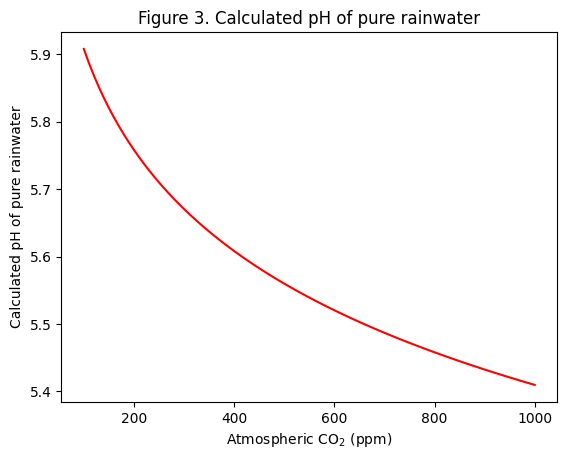

In [ ]:
import numpy as np                    #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt       #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                   #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve     #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table   #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Kh=3.40e-2            #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7           #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11          #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14            #Kw  = hdr*hox      = x[4]*x[5]
#Ksp=4.6e-9           #Ksp = cal*car      = x[6]*x[3]
Ksp=0                 #this is the CO2 only case, setting this to zero will hold [calcium}=0

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCO2OnlyOpen(x):                        #our function's input is an array called "x" while inside the function, indexing starts with zero
    f0=x[1]-(Kh*x[0])                         #Kh, Henry's Law for CO2 gas
    f1=x[4]*x[2]-(Ka1*x[1])                   #Ka1, of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                   #Ka2, of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                           #Kw, dissociation of water
    f4=x[6]*x[3]-Ksp                          #Ksp, dissociation of calcium carbonate, Ksp=0 in CO2 only, makes[cal]=0
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]           #charge balance
    f6=x[0]-Pinit                           #partial pressure of CO2 (x[0]) is constant and always equal to the value of Pinit, unlimited total dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5,f6])   #return the signed residual of each equation

PPMVals=np.arange(100,1010,10)
PPMIdxs=np.arange(len(PPMVals))

dfRangeP=pd.DataFrame(index=PPMVals,columns=["atm","co2","bct","car","hdr","hox","cal"])
for PPM,Index in zip(PPMVals,PPMIdxs):     #this loop will step through the mixing ratios and their indexes
  Pinit=PPM/1.0e6                          #change units of Pinit for this iteration of the loop to atmospheres

  #inital guess for the CO2 only system loaded into an array
  atm=Pinit
  co2=Pinit*Kh
  bct=np.sqrt(Ka1*co2)
  hdr=np.sqrt(Ka1*co2)
  hox=Kw/hdr
  car=Ka2*bct/hdr
  cal=0.0
  xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])

  xCalc=fsolve(FunCO2OnlyOpen,xGuess) #SciPy does the work!
  dfRangeP.iloc[Index,:]=xCalc        #store the result in the appropriate spot in the dataframe
  pHCalc=-np.log10(xCalc[4])          #hydronium ion has an index of 4 (5th value, but indexing starts with 0!)

press=PPMVals
hyds=np.array(dfRangeP['hdr'],dtype=float)
pHs=-np.log10(hyds)

fig,ax=plt.subplots()
ax.plot(press,pHs, linestyle='solid', marker='none', color=Colors[4])
ax.set_xlabel("Atmospheric $\mathrm{CO_2}$ (ppm)")
ax.set_ylabel("Calculated pH of pure rainwater")
ax.set_title("Figure 3. Calculated pH of pure rainwater")

Modify the code below to calculate the pH at ppm ranges that correspond to 0.1 to 10 psi and make a plot like Figure 3 with properly labeled axes.  [Annotate your plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) to show the experimental values for pressure and pH.  Customize and save this figure to be included in your lab report.

,atm,co2,bct,car,hdr,hox,cal
0.1,0.006805,0.000231,0.00001,0.0,0.00001,0.0,0.0
0.2,0.013609,0.000463,0.000014,0.0,0.000014,0.0,-0.0
0.3,0.020414,0.000694,0.000018,0.0,0.000018,0.0,-0.0
0.4,0.027218,0.000925,0.00002,0.0,0.00002,0.0,-0.0
0.5,0.034023,0.001157,0.000023,0.0,0.000023,0.0,0.0
...,...,...,...,...,...,...,...
9.6,0.653241,0.02221,0.0001,0.0,0.0001,0.0,-0.0
9.7,0.660046,0.022442,0.0001,0.0,0.0001,0.0,0.0
9.8,0.66685,0.022673,0.000101,0.0,0.000101,0.0,-0.0
9.9,0.673655,0.022904,0.000101,0.0,0.000101,0.0,0.0


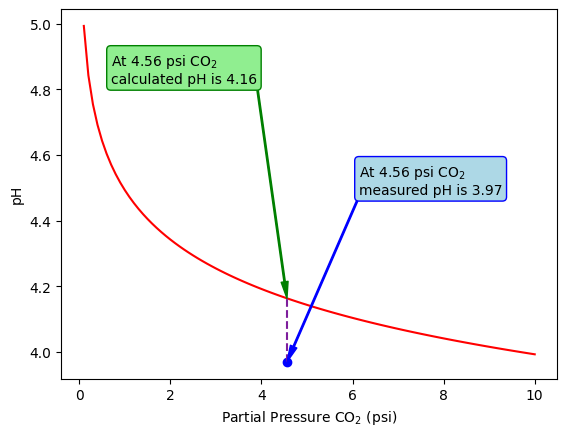

In [ ]:
import numpy as np                    #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt       #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                   #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve     #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table   #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Kh=3.40e-2            #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7           #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11          #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14            #Kw  = hdr*hox      = x[4]*x[5]
#Ksp=4.6e-9           #Ksp = cal*car      = x[6]*x[3]
Ksp=0                 #this is the CO2 only case, setting this to zero will hold [calcium}=0

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCO2OnlyOpen(x):                        #our function's input is an array called "x" while inside the function, indexing starts with zero
    f0=x[1]-(Kh*x[0])                         #Kh, Henry's Law for CO2 gas
    f1=x[4]*x[2]-(Ka1*x[1])                   #Ka1, of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                   #Ka2, of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                           #Kw, dissociation of water
    f4=x[6]*x[3]-Ksp                          #Ksp, dissociation of calcium carbonate, Ksp=0 in CO2 only, makes[cal]=0
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]           #charge balance
    f6=x[0]-Pinit                             #partial pressure of CO2 (x[0]) is constant and always equal to the value of Pinit, unlimited total dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5,f6])   #return the signed residual of each equation

def FunCO2OnlyClosed(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[1]+x[2]+x[3]-(Kh*Pinit)
    return np.array([f0,f1,f2,f3,f4,f5,f6])

PSIVals=     #create a numpy array that goes from 0.1 to 10 psi in increments of 0.1 psi
PPMVals=PSIVals*0.06804596*1.0e6
PPMIdxs=np.arange(len(PPMVals))
dfRangeP=pd.DataFrame(index=PSIVals,columns=["atm","co2","bct","car","hdr","hox","cal"])

for PPM,Index in zip(PPMVals,PPMIdxs):
  Pinit=PPM/1.0e6
  atm=Pinit
  co2=Pinit*Kh
  bct=np.sqrt(Ka1*co2)
  hdr=np.sqrt(Ka1*co2)
  hox=Kw/hdr
  car=Ka2*bct/hdr
  cal=0.0
  xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])
  xCalc=fsolve(FunCO2OnlyOpen,xGuess)
  dfRangeP.iloc[Index,:]=xCalc
  pHCalc=-np.log10(xCalc[4])

press=PSIVals
hyds=np.array(dfRangeP['hdr'],dtype=float)
pHs=-np.log10(hyds)

fig,ax=plt.subplots() #this line creates a blank figure
#complete the line of code below to title your figure
ax.set_title()
#complete the line of code below to plot press as the x-data and pHs for the y-data
ax.plot()
#complete the lines of code below to label the x- and y-axes
ax.set_xlabel()
ax.set_ylabel()

#Students should enter their experimental pressure in psi and measured pH
PSIExp=
PHExp=

ax.plot(PSIExp,PHExp, linestyle='none', marker='o', color="blue")
strPHExp="{:.2f}".format(PHExp)

PPMExp=PSIExp*0.06804596*1.0e6
Pinit=PPMExp/1.0e6
atm=Pinit
co2=Pinit*Kh
bct=np.sqrt(Ka1*co2)
hdr=np.sqrt(Ka1*co2)
hox=Kw/hdr
car=Ka2*bct/hdr
cal=0.0
xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])
xExp=fsolve(FunCO2OnlyOpen,xGuess)
pHCalc=-np.log10(xExp[4])
str_pHCalc="{:.2f}".format(pHCalc)
ax.annotate('At '+str(PSIExp)+' psi $\mathrm{CO_2}$\n'+
            'measured pH is '+str(strPHExp),
            xy=(PSIExp, PHExp), xycoords='data',                           #"data' is the default unit for graph coodinates
            xytext=(0.6, 0.5), textcoords='axes fraction',                 #'axes fraction' is (x,y) lower left is (0,0) upper right is (1,1)
            arrowprops={'color': 'blue', 'width':1, 'headwidth':5},
            bbox={'boxstyle':'round', 'edgecolor':'blue','facecolor':'lightBlue'}
            )
ax.annotate('At '+str(PSIExp)+' psi $\mathrm{CO_2}$\n'+
            'calculated pH is '+str(str_pHCalc),
            xy=(PSIExp, pHCalc), xycoords='data',                           #"data' is the default unit for graph coodinates
            xytext=(0.1, 0.8), textcoords='axes fraction',                 #'axes fraction' is (x,y) lower left is (0,0) upper right is (1,1)
            arrowprops={'color': 'green', 'width':1, 'headwidth':5},
            bbox={'boxstyle':'round', 'edgecolor':'green','facecolor':'lightGreen'}
            )
ax.vlines(PSIExp, np.min([pHCalc,PHExp]), np.max([pHCalc,PHExp]),linestyles='dashed',color="xkcd:purple")
dfRangeP

# Part V: The $\mathrm{CaCO_3}$ Only System

Now that we have results for an atmospheric $CO_2$ only system, let's consider a calcium carbonate (limestone) only system.  The definition of the system only requires two minor changes.

1. Set the value of Ksp to 4.9e-9 (it was set to 0 in the CO2 only case)
2. Change the mass balance to mass balance for calcium (see above Part II, Mass Balance, Calcium Mass balance)

##Describing the system in Python

###(III) Calcium Mass Balance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9           #Ksp = cal*car      = x[6]*x[3]

Pinit=4.25e-04

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCarOnly(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]*x[3]-Ksp
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[6]-x[0]-x[1]-x[2]-x[3]               #mass balance (here we assume the total amount of carbon is = the total amount of calcium)
    return np.array([f0,f1,f2,f3,f4,f5,f6])

##Estimating Each Variable

**Activity**: Complete the code block below assuming that the inital amount of atmospheric $CO_2$ is zero.  The two reactions that will be important here are the Ksp of calcite followed by Kb1 of carbonate.  

Note: We will need to take care when using Kb1.  It is a fairly large equilibrium constant (Kw/Ka2 = 2.1e-4) relative to the initial concentration of carbonate predicted by Ksp ($\sqrt{Ksp}$ = 6.8e-5).  We will not be able to make the simplyfing assumption that change in carbonate concentration is negligible, and will need to find the positive root of a second order polynomial.  It will likely be necessary to work this out on paper before completing the code block below.

In [ ]:
#CO2 partial pressure starts, and dissolved concentrations all start at zero for carbonate only system
Pinit=0
atm=Pinit
co2=0

#initial guess for calcium is zero, in the CO2 only case
cal=np.sqrt(Ksp)
car=np.sqrt(Ksp) #We'll need to revise this later after making an ICE table for Kb1

Kb1=Kw/Ka2
# we can't use the "x is small" approximation and must find the roots of the second order polynomial
# Kb1=x^2/(car-x) so (1*x^2) + (Kb1*x^1) + (-Kb1*car*x^0) = 0
rootsKb1 = np.roots([1, Kb1, -Kb1*car])    #find all the roots of a polynomial, 2 in this case
posRootKb1=rootsKb1[rootsKb1>0][0]         #this line finds the single positive root of the quadratic

#initial guess for bicarbonate concentration based on initial carbonate (sqrt(Ksp)) and Kb1
bct=posRootKb1

#initial guess for hydroxide concentration based on initial carbonate (sqrt(Ksp)) and Kb1
hox=posRootKb1

#revised guess for carbonate concentration based on Ksp and amount consumed in Kb1
car=np.sqrt(Ksp)-posRootKb1

#initial guess for hydronium concentration based on hydroxide
hdr=Kw/hox

xGuess=np.array([atm,co2,bct,car,hdr,hox,cal]) #here we pack the seven individual amounts into an array, which we can pass into our functions

print("------Initial-------")
print("Intial estimates = ",xGuess)
print("----")
resGuess=FunCarOnly(xGuess)
print("Residuals in initial estimates= ",resGuess)
errorGuess=np.sqrt(np.sum(resGuess**2))
print("initial error open = ",errorGuess)

------Initial-------
Intial estimates =  [0.00000000e+00 0.00000000e+00 5.40977186e-05 1.37255812e-05
 1.84850679e-10 5.40977186e-05 6.78232998e-05]
----
Residuals in initial estimates=  [ 0.00000000e+00  1.00000000e-14 -1.57772181e-30  0.00000000e+00
 -3.66908579e-09  1.84850679e-10  0.00000000e+00]
initial error open =  3.673739281187078e-09


##Calculations

In the code cell below we put together the definitions of the system and the initial estimates along with code to print our results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9           #Ksp = cal*car      = x[6]*x[3]

Pinit=4.25e-04

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCarOnly(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]*x[3]-Ksp
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[6]-x[0]-x[1]-x[2]-x[3]               #mass balance (here we assume the total amount of carbon is = the total amount of calcium)
    return np.array([f0,f1,f2,f3,f4,f5,f6])

Pinit=0
atm=Pinit
co2=0
cal=np.sqrt(Ksp)
car=np.sqrt(Ksp)
Kb1=Kw/Ka2
# we can't use the "x is small" approximation and must find the roots of the second order polynomial
# Kb1=x^2/(car-x) so (1*x^2) + (Kb1*x^1) + (-Kb1*car*x^0) = 0
rootsKb1 = np.roots([1, Kb1, -Kb1*car])    #find all the roots of a polynomial, 2 in this case
posRootKb1=rootsKb1[rootsKb1>0][0]         #this line finds the single positive root of the quadratic
bct=posRootKb1
hox=posRootKb1
car=np.sqrt(Ksp)-posRootKb1
hdr=Kw/hox
xGuess=np.array([atm,co2,bct,car,hdr,hox,cal]) #here we pack the seven individual amounts into an array, which we can pass into our functions

xCalc=fsolve(FunCarOnly,xGuess)

print("------Initial-------")
print("Intial estimates = ",xGuess)
resGuess=FunCarOnly(xGuess)
print("Residuals in initial estimates = ",resGuess)
errorGuess=np.sqrt(np.sum(resGuess**2))
print("initial error = ",errorGuess)
print("\nInitial pH = ",-np.log10(xGuess[4]))

print("\n------Optimized-------")
print("Optimized estimates = ",xCalc)
resCalc=FunCarOnly(xCalc)
print("Residuals in optimized estimates =",resCalc)
errorCalc=np.sqrt(np.sum(resCalc**2))
print("error optimized = ",errorCalc)
print("\nOptimized pH = ",-np.log10(xCalc[4]))

------Initial-------
Intial estimates =  [0.00000000e+00 0.00000000e+00 5.40977186e-05 1.37255812e-05
 1.84850679e-10 5.40977186e-05 6.78232998e-05]
Residuals in initial estimates =  [ 0.00000000e+00  1.00000000e-14 -1.57772181e-30  0.00000000e+00
 -3.66908579e-09  1.84850679e-10  0.00000000e+00]
initial error =  3.673739281187078e-09

Initial pH =  9.733178950612643

------Optimized-------
Optimized estimates =  [6.49522318e-07 2.20837588e-08 8.78290392e-05 3.67317189e-05
 1.12142368e-10 8.91723635e-05 1.25232364e-04]
Residuals in optimized estimates = [ 3.30872245e-24 -1.57772181e-30  0.00000000e+00  0.00000000e+00
 -8.27180613e-25 -1.35525272e-20 -6.77626358e-21]
error optimized =  1.5152186377775653e-20

Optimized pH =  9.950230277681266


Now that we've put the pieces together and gotten reasonable results, we can tidy up, store, and display our values.  We will use a Pandas data frame to hold the values in labeled rows and columns.

##Results and interpretation

,atm,co2,bct,car,hdr,hox,cal
Car Only (Guess),0.000000e+00,0.000000e+00,0.000054,0.000014,1.848507e-10,0.000054,0.000068
Car Only (Optimized),6.495223e-07,2.208376e-08,0.000088,0.000037,1.121424e-10,0.000089,0.000125


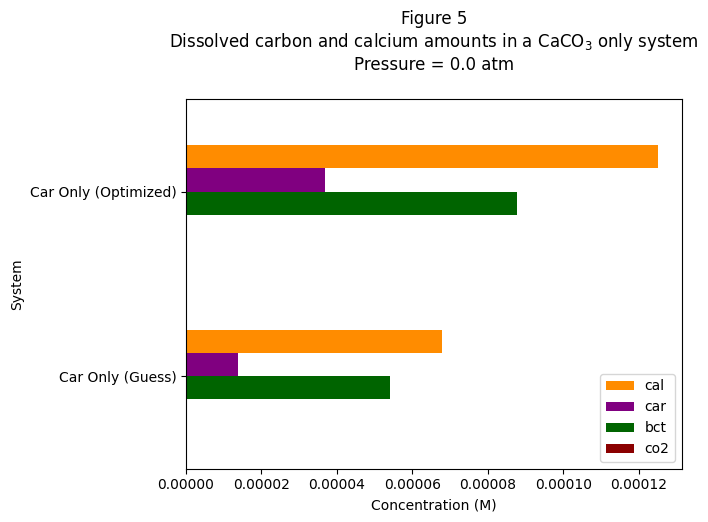

In [ ]:
#here we make an empty dataframe to hold all our results with 7 named columns
dfCarOnly=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"])
dfCarOnly.loc["Car Only (Guess)"]=xGuess
dfCarOnly.loc["Car Only (Optimized)"]=xCalc

strFig="Figure 5\n"
strSys="$\mathrm{CaCO_3}$ only system\n"
strP="Pressure = "+str(Pinit*1e6)+" atm\n"
chartTitle=strFig+"Dissolved carbon and calcium amounts in a "+strSys+strP

ax = dfCarOnly[['co2','bct','car','cal']].plot(kind='barh',
                                               color=ChartColors,
                                               rot=0,
                                               ylabel='System',
                                               xlabel='Concentration (M)',
                                               title=chartTitle)

plt.legend(loc='lower right',reverse=True)
dfCarOnly

# Part VI: The $\mathrm{CO_2}$ and $\mathrm{CaCO_3}$ System

After considering the two systems separately, we can now consider them combined.  We will need to modify both the function and our initial guesses.

**Activity**: Modify the code block below go that we can calculate the concentration when both systems participate in equilibrium.  

For the function (which we call "FunCO2Car") the only change from the carbonate only system is to mass balance. Now that we have two different sources of carbon - atmosperic $CO_2$ and dissolution of solid $CaCO_3$ - mass balance no longer applies.  Instead we will fix the partial pressure of carbon dioxide to the intial value (stored in the variable "Pinit").



##Describing the system in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9

Pinit=4.25e-04

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCO2Car(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]*x[3]-Ksp
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[0]-Pinit                                 #mass balance doesn't apply (carbon can come from atmospheric CO2 or calcium carbonate), atmospheric CO2 is fixed at its intial value
    return np.array([f0,f1,f2,f3,f4,f5,f6])

##Estimating Each Variable

Because both systems produce aqueous species we can add together the amounts produced by the $CO_2$ only system and the $CaCO_3$ only systems.  

In the limestone system we noticed that carbonate's reaction with water (Kb1) increased the amount of calcium that dissolved (Ksp), so the estimates after optimization should be closer.  (Note this was also true to a lesser extent in the $CO2$ only system in which Ka2 of bicarbonate produced a bit more hydronium)To use values stored in our previous dataframes in a calculation we use a similar syntax to putting values into the table.  For example:

```

bct=[dfCO2Only.loc["CO2 Only (Open)"],"bct"]+dfCarOnly.loc["Car Only (Optimized)"."bct"]
```
adds together the bicarbonate concentration from both systems considered separately.

We expect the pH of the system to be somewhere between the 2 pKas of carbonic acid.  Calculate the average of the two pKas, and base your intial guess for hydroxide and hydronium on this pH.:

In [ ]:
# start by setting the initial pressure to the current mixing ratio of CO2 in atm
Pinit=425/1.0e6

#intial guess for final partial pressure of CO2 gas in atmospheres
atm=Pinit

#initial guesses
co2=dfCO2Only.loc["CO2 Only (Open)","co2"]+dfCarOnly.loc["Car Only (Optimized)","co2"]
bct=dfCO2Only.loc["CO2 Only (Open)","bct"]+dfCarOnly.loc["Car Only (Optimized)","bct"]
car=dfCO2Only.loc["CO2 Only (Open)","car"]+dfCarOnly.loc["Car Only (Optimized)","car"]
cal=dfCO2Only.loc["CO2 Only (Open)","cal"]+dfCarOnly.loc["Car Only (Optimized)","cal"]
pKa1=-np.log10(Ka1)
pKa2=-np.log10(Ka2)
pH_est=np.mean([pKa1,pKa2])
print(pH_est)
hdr=10**-(pH_est)                                #initial guess for hydronium concentration based on ocean pH
hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])

print("------Initial-------")
print("Intial estimates CO2 and CaCO3= ",xGuess)
print("----")
resGuess=FunCO2Car(xGuess)
print("Residuals in initial estimates= ",resGuess)
errorGuess=np.sqrt(np.sum(resGuess**2))
print("initial error CO2 and CaCO3= ",errorGuess)

NameError: name 'dfCO2Only' is not defined

##Calculations

In the code cell below we put together the definitions of the system and the initial estimates along with code to print our results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"

Kh=3.40e-2
Ka1=4.46e-7
Ka2=4.69e-11
Kw=1.0e-14
Ksp=4.6e-9

Pinit=4.25e-04

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCO2Car(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]*x[3]-Ksp
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[0]-Pinit
    return np.array([f0,f1,f2,f3,f4,f5,f6])

Pinit=425/1.0e6
atm=Pinit

co2=dfCO2Only.loc["CO2 Only (Open)","co2"]+dfCarOnly.loc["Car Only (Optimized)","co2"]
bct=dfCO2Only.loc["CO2 Only (Open)","bct"]+dfCarOnly.loc["Car Only (Optimized)","bct"]
car=dfCO2Only.loc["CO2 Only (Open)","car"]+dfCarOnly.loc["Car Only (Optimized)","car"]
cal=dfCO2Only.loc["CO2 Only (Open)","cal"]+dfCarOnly.loc["Car Only (Optimized)","cal"]

pKa1=-np.log10(Ka1)
pKa2=-np.log10(Ka2)
pH_est=np.mean([pKa1,pKa2])
hdr=10**-(pH_est)                           #initial guess for hydronium concentration based on ocean pH
hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])

xCalc=fsolve(FunCO2Car,xGuess)

print("------Initial-------")
print("Intial estimates = ",xGuess)
resGuess=FunCO2Car(xGuess)
print("Residuals in initial estimates = ",resGuess)
errorGuess=np.sqrt(np.sum(resGuess**2))
print("initial error = ",errorGuess)
print("\nInitial pH = ",-np.log10(xGuess[4]))

print("\n------Optimized-------")
print("Optimized estimates = ",xCalc)
resCalc=FunCO2Car(xCalc)
print("Residuals in optimized estimates =",resCalc)
errorCalc=np.sqrt(np.sum(resCalc**2))
print("error optimized = ",errorCalc)
print("\nOptimized pH = ",-np.log10(xCalc[4]))

NameError: name 'dfCO2Only' is not defined

Did you get a warning?

The message

` "RuntimeWarning: The iteration is not making good progress, as measured by the improvement from the last five Jacobian evaluations." `

means that our search for the values of x that minimize the sum of the squares of the errors from our function is not going well and has stopped.  It is often a sign that the initial guesses are off, the search has veered past a reasonable bound, or the problem is ill conditioned.

**Caution**: Warnings are important, but they are only issued the first time you execute a cell.  If you run the cell above again without changing anything the warning will not display again.  Always check the numerical value of the error in your fit. We can do better than 6.9e-13!

There are at least two good routes here.

A) Look at where your search started and stopped. Use that information, along careful thinking about all the equilibrium reactions, to improve your initial guess.  Try thinking about how to combine and simplify Ka1 and Kb1 into a single reaction to produce bicarbonate.  We will leave that route for the lab report, but you can check your understanding by trying to make a better initial guess in the code block above. The warning will disappear, but the optimal solution should give an error of around 1.1e-19 (about 6,000,000 times lower)

B) Search longer and more carefully using another optimization function. [Scipy's "least_squares"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) is a good choice as it allows adjustments - setting bounds (e.g. concentrations remain positive), termination tolerances (e.g. gtol=None will prevent it from stopping if the search is going slowly), and search method ("dogbox" is a good match for our bounded problem with only a few equations that is not [rank deficient](https://stats.stackexchange.com/questions/35071/what-is-rank-deficiency-and-how-to-deal-with-it)).

In [ ]:
from scipy.optimize import least_squares

#res1=least_squares(FunCO2Car,x0,bounds=(0, 0.1),gtol=None,ftol=None,xtol=2.5e-16,max_nfev=10000,method="dogbox",jac='3-point')
res1=least_squares(FunCO2Car,xGuess,bounds=(0, 0.1),gtol=None,method="dogbox")
xCalc=res1.x
print(res1.message)
print(res1.optimality)

print("------Initial-------")
print("Intial estimates = ",xGuess)
resGuess=FunCO2Car(xGuess)
print("Residuals in initial estimates = ",resGuess)
errorGuess=np.sqrt(np.sum(resGuess**2))
print("initial error = ",errorGuess)
print("\nInitial pH = ",-np.log10(xGuess[4]))

print("\n------Optimized-------")
print("Optimized estimates = ",xCalc)
resCalc=FunCO2Car(xCalc)
print("Residuals in optimized estimates =",resCalc)
errorCalc=np.sqrt(np.sum(resCalc**2))
print("error optimized = ",errorCalc)
print("\nOptimized pH = ",-np.log10(xCalc[4]))

`xtol` termination condition is satisfied.
1.0164395413673264e-19
------Initial-------
Intial estimates =  [4.25000000e-04 1.44720838e-05 9.03656665e-05 3.67317657e-05
 4.57355442e-09 2.18648322e-06 1.25232364e-04]
Residuals in initial estimates =  [ 2.20837588e-08 -6.04125706e-12  1.63756580e-13  0.00000000e+00
  5.86408231e-15  8.44536207e-05  0.00000000e+00]
initial error =  8.44536235727736e-05

Initial pH =  8.339746149286388

------Optimized-------
Optimized estimates =  [4.25000000e-04 1.44500000e-05 1.07515536e-03 8.41225800e-06
 5.99420349e-09 1.66827837e-06 5.46821079e-04]
Residuals in optimized estimates = [ 0.00000000e+00  7.27014210e-26  5.69873118e-27 -1.10913843e-27
 -5.54211010e-23 -5.08219768e-20  0.00000000e+00]
error optimized =  5.082200705351239e-20

Optimized pH =  8.222268517775538


Now that we've put the pieces together and gotten reasonable results, we can tidy up, store, and display our values.  We will use a Pandas data frame to hold the values in labeled rows and columns.

##Results and interpretation

,atm,co2,bct,car,hdr,hox,cal
CO2+Car (Guess),0.000425,0.000014,0.000090,0.000037,4.573554e-09,0.000002,0.000125
CO2+Car (Optimized),0.000425,0.000014,0.001075,0.000008,5.994203e-09,0.000002,0.000547


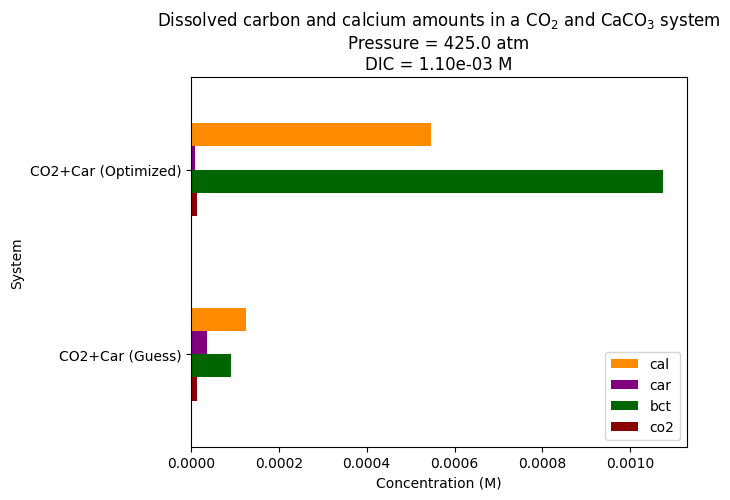

In [ ]:
#here we make an empty dataframe to hold all our results with 7 named columns
dfCO2Car=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"])
dfCO2Car.loc["CO2+Car (Guess)"]=xGuess
dfCO2Car.loc["CO2+Car (Optimized)"]=xCalc

strFig="Figure 6\n"
strSys="$\mathrm{CO_2}$ and $\mathrm{CaCO_3}$ system\n"
strP="Pressure = "+str(Pinit*1e6)+" atm\n"
chartTitle=strFig+"Dissolved carbon and calcium amounts in a "+strSys+strP

ax = dfCO2Car[['co2','bct','car','cal']].plot(kind='barh',
                                               color=ChartColors,
                                               rot=0,
                                               ylabel='System',
                                               xlabel='Concentration (M)',
                                               title=chartTitle)


plt.legend(loc='lower right',reverse=True)
dfCO2Car

#Part VII: Effect of Atmospheric $\mathrm{CO_2}$ on the pH of Saltwater

Our current model does not incorporate many important characteristics that are important for ocean chemistry.  Which equilibrium would you predict to be most impacted by changes on temperature? Which by ionic strength?

Activity:  Use the provided code below based on [equations in Table 1.1 by Dickson](https://www.pmel.noaa.gov/co2/files/dickson_thecarbondioxidesysteminseawater_equilibriumchemistryandmeasurementspp17-40.pdf) to calculate effective equilibrium constants for the five equilibria in ocean water with a temperature of $20^o$C (293 K) and a salinity of 35 g/kg.  Use these estimates to estimate the equilibrium concentrations of the 7 species.

In [ ]:
dfEqCon=pd.DataFrame(columns=["Kh","Ka1","Ka2","Kw","Ksp"])

Kh=3.40e-2      #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7     #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11    #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14      #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9      #Ksp = cal*car      = x[6]*x[3]
dfEqCon.loc["T=25 S=0"]=[Kh,Ka1,Ka2,Kw,Ksp]

temp=20+273.15
sal=35

Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
dfEqCon.loc["T=20 S=35"]=[Kh,Ka1,Ka2,Kw,Ksp]

dfEqCon

,Kh,Ka1,Ka2,Kw,Ksp
T=25 S=0,0.034000,4.460000e-07,4.690000e-11,1.000000e-14,4.600000e-09
T=20 S=35,0.032725,1.284218e-06,8.983659e-10,3.817821e-14,4.300035e-07


Take a moment to compare the values of the effective equilibrium constants for seawater to those in which we ignore activity ($\mu$=0).  We can run the previous calculation for the system with these effective equilibrium constants.

`xtol` termination condition is satisfied.
5.30242624981192e-19
------Initial-------
Intial estimates =  [4.25000000e-04 1.44500000e-05 1.07515536e-03 8.41225800e-06
 5.99420349e-09 1.66827837e-06 5.46821079e-04]
Residuals in initial estimates =  [ 5.41957105e-07 -1.21122531e-11 -9.15458095e-13 -2.81782113e-14
 -4.25403515e-07 -5.08219768e-20  0.00000000e+00]
initial error =  6.88974349389991e-07

Initial pH =  8.222268517775538

------Optimized-------
Optimized estimates =  [4.25000000e-04 1.39080429e-05 2.39594081e-03 2.88735757e-04
 7.45467578e-09 5.12137784e-06 1.48926312e-03]
Residuals in optimized estimates = [ 0.00000000e+00  0.00000000e+00  4.03896783e-28  6.31088724e-30
  0.00000000e+00 -2.65121312e-19  0.00000000e+00]
error optimized =  2.65121312490596e-19

Optimized pH =  8.12757123998679


,atm,co2,bct,car,hdr,hox,cal
CO2+Car+Salt (Guess),0.000425,0.000014,0.001075,0.000008,5.994203e-09,0.000002,0.000547
CO2+Car+Salt (Optimized),0.000425,0.000014,0.002396,0.000289,7.454676e-09,0.000005,0.001489


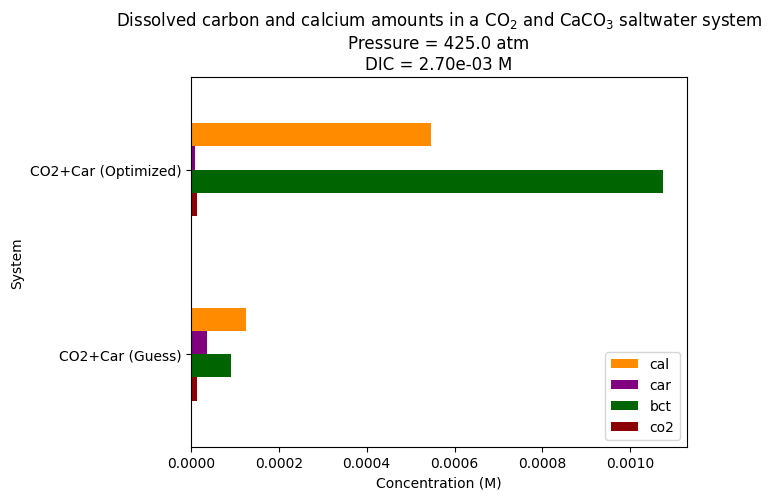

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"

dfEqCon=pd.DataFrame(columns=["Kh","Ka1","Ka2","Kw","Ksp"])

Kh=3.40e-2      #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7     #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11    #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14      #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9      #Ksp = cal*car      = x[6]*x[3]
dfEqCon.loc["T=25 S=0"]=[Kh,Ka1,Ka2,Kw,Ksp]

temp=20+273.15
sal=35

Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
dfEqCon.loc["T=20 S=35"]=[Kh,Ka1,Ka2,Kw,Ksp]

Pinit=4.25e-04

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCO2Car(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]*x[3]-Ksp
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[0]-Pinit
    return np.array([f0,f1,f2,f3,f4,f5,f6])

atm=dfCO2Car.loc["CO2+Car (Optimized)","atm"]
co2=dfCO2Car.loc["CO2+Car (Optimized)","co2"]
bct=dfCO2Car.loc["CO2+Car (Optimized)","bct"]
car=dfCO2Car.loc["CO2+Car (Optimized)","car"]
hdr=dfCO2Car.loc["CO2+Car (Optimized)","hdr"]
hox=dfCO2Car.loc["CO2+Car (Optimized)","hox"]
cal=dfCO2Car.loc["CO2+Car (Optimized)","cal"]
xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])

res1=least_squares(FunCO2Car,xGuess,bounds=(0, 0.1),gtol=None,method="dogbox")
xCalc=res1.x
print(res1.message)
print(res1.optimality)

print("------Initial-------")
print("Intial estimates = ",xGuess)
resGuess=FunCO2Car(xGuess)
print("Residuals in initial estimates = ",resGuess)
errorGuess=np.sqrt(np.sum(resGuess**2))
print("initial error = ",errorGuess)
print("\nInitial pH = ",-np.log10(xGuess[4]))

print("\n------Optimized-------")
print("Optimized estimates = ",xCalc)
resCalc=FunCO2Car(xCalc)
print("Residuals in optimized estimates =",resCalc)
errorCalc=np.sqrt(np.sum(resCalc**2))
print("error optimized = ",errorCalc)
print("\nOptimized pH = ",-np.log10(xCalc[4]))

#here we make an empty dataframe to hold all our results with 7 named columns
dfCO2CarSalt=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"])
dfCO2CarSalt.loc["CO2+Car+Salt (Guess)"]=xGuess
dfCO2CarSalt.loc["CO2+Car+Salt (Optimized)"]=xCalc

strSys="$\mathrm{CO_2}$ and $\mathrm{CaCO_3}$ saltwater system\n"
strP="Pressure = "+str(Pinit*1e6)+" atm\n"
strDIC="DIC = "+"{:.2e}".format(xCalc[1]+xCalc[2]+xCalc[3])+" M"
chartTitle="Dissolved carbon and calcium amounts in a "+strSys+strP+strDIC

ax = dfCO2Car[['co2','bct','car','cal']].plot(kind='barh',
                                               color=ChartColors,
                                               rot=0,
                                               ylabel='System',
                                               xlabel='Concentration (M)',
                                               title=chartTitle)

plt.legend(loc='lower right',reverse=True)
dfCO2CarSalt

Now that our code accounts for temperature and salinity we are ready to model how atmospheric carbon dioxide afects the pH of saltwater

,atm,co2,bct,car,hdr,hox,cal
100,0.0001,0.000003,0.001362,0.000397,0.0,0.000012,0.001084
110,0.00011,0.000004,0.001416,0.00039,0.0,0.000012,0.001104
120,0.00012,0.000004,0.001467,0.000383,0.0,0.000011,0.001122
130,0.00013,0.000004,0.001515,0.000377,0.0,0.000011,0.00114
140,0.00014,0.000005,0.00156,0.000372,0.0,0.00001,0.001157
...,...,...,...,...,...,...,...
960,0.00096,0.000031,0.003231,0.000232,0.0,0.000003,0.00185
970,0.00097,0.000032,0.003243,0.000232,0.0,0.000003,0.001855
980,0.00098,0.000032,0.003255,0.000231,0.0,0.000003,0.00186
990,0.00099,0.000032,0.003267,0.00023,0.0,0.000003,0.001866


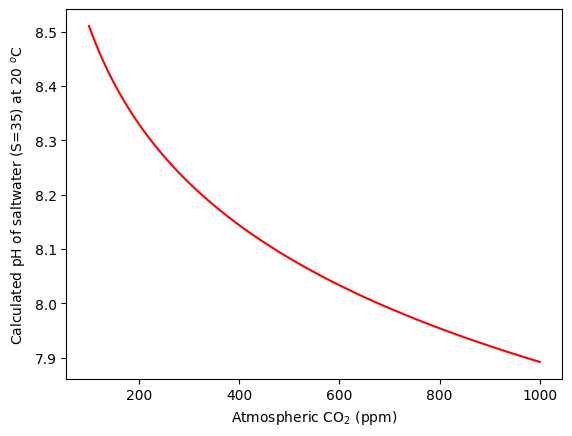

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"

tempC=20
temp=tempC+273.15
sal=35

Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
dfEqCon.loc["T=20 S=35"]=[Kh,Ka1,Ka2,Kw,Ksp]

Pinit=4.25e-04

Colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]
ChartColors=["DarkRed","DarkGreen","Purple","DarkOrange"]

def FunCO2Car(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]*x[3]-Ksp
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[0]-Pinit
    return np.array([f0,f1,f2,f3,f4,f5,f6])

PPMVals=np.arange(100,1010,10)
PPMIdxs=np.arange(len(PPMVals))
dfRangeP=pd.DataFrame(index=PPMVals,columns=["atm","co2","bct","car","hdr","hox","cal"])

for PPM,Index in zip(PPMVals,PPMIdxs):     #this loop will step through the mixing ratios and their indexes
  Pinit=PPM/1.0e6                          #change units of Pinit for this iteration of the loop to atmospheres
  if Index==0:
    atm=Pinit
    co2=atm*Kh                                  #calculates the initial dissolved CO2 using Henry's Law constant
    cal=np.sqrt(Ksp)                            #initial guess for calcium concentration based on Ksp
    car=np.sqrt(Ksp)                            #initial guess for carbonate concentration based on Ksp
    bct=np.sqrt(Ka1*co2) + np.sqrt(car*Kw/Ka2)  #initial guess for bicarbonate concentration based on sum of CO2 only and calcium carbonate
    hdr=10**-(8)                                #initial guess for hydronium concentration based on ocean pH
    hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
    xGuess=np.array([atm,co2,bct,car,hdr,hox,cal])
  else:
    xGuess=np.array(dfRangeP.iloc[Index-1,:],dtype=float)
  res1=least_squares(FunCO2Car,xGuess,bounds=(0, 0.1),gtol=None,method="dogbox")
  xCalc=res1.x
  dfRangeP.iloc[Index,:]=xCalc        #store the result in the appropriate spot in the dataframe
  pHCalc=-np.log10(xCalc[4])          #hydronium ion has an index of 4 (5th value, but indexing starts with 0!)

press=PPMVals
hyds=np.array(dfRangeP['hdr'],dtype=float)
pHs=-np.log10(hyds)

fig,ax=plt.subplots()
ax.plot(press,pHs, linestyle='solid', marker='none', color=Colors[4])
ax.set_xlabel("Atmospheric $\mathrm{CO_2}$ (ppm)")
ax.set_ylabel("Calculated pH of saltwater (S="+str(sal)+") at "+str(tempC)+" $^o$C")
dfRangeP

<ipython-input-20-47fbc2b87011>:69: UserWarning: The figure layout has changed to tight
  fig2.tight_layout()


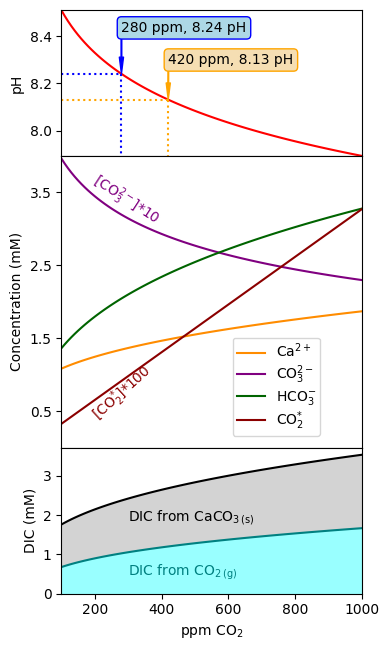

In [ ]:
pH=-np.log10(np.array(dfRangeP['hdr'],dtype='float'))
dicT=np.array(dfRangeP['car']+dfRangeP['bct']+dfRangeP['co2'],dtype='float')*1000
dicL=np.array(dfRangeP['cal'],dtype='float')*1000
dicA=dicT-dicL

from matplotlib.gridspec import GridSpec
colors=["Teal","DarkRed","DarkGreen","Purple","Red","Blue","DarkOrange"]

fig2 = plt.figure(layout="constrained",figsize=(3.33*1.2,5.5*1.2))
gs = GridSpec(4, 1, figure=fig2)
gs.update(wspace=0.0, hspace=0.0)
ax_pH = fig2.add_subplot(gs[0, 0])
ax_M = fig2.add_subplot(gs[1:3, 0])
ax_DIC = fig2.add_subplot(gs[3, 0])

ax_pH.plot(press,pH,color=colors[4])
ax_pH.hlines(-np.log10(np.array(dfRangeP.loc[420,'hdr'],dtype='float')),0,420,linestyles='dotted',colors='orange')
ax_pH.vlines(420,-np.log10(np.array(dfRangeP.loc[420,'hdr'],dtype='float')),np.min(pH),linestyles='dotted',colors='orange')
ax_pH.hlines(-np.log10(np.array(dfRangeP.loc[280,'hdr'],dtype='float')),0,280,linestyles='dotted',colors='blue')
ax_pH.vlines(280,-np.log10(np.array(dfRangeP.loc[280,'hdr'],dtype='float')),np.min(pH),linestyles='dotted',colors='blue')
ax_pH.set_ylim([np.min(pH),np.max(pH)])
ax_pH.set_xlim([np.min(press),np.max(press)])
ax_pH.tick_params(bottom=False, labelbottom=False)
ax_pH.set_ylabel(r"pH")
ppmPre=280
atmPre=ppmPre/1e6
hdrPre=np.array(dfRangeP['hdr'][dfRangeP['atm']==atmPre],dtype='float')
pHpre=-np.log10(hdrPre[0])
ax_pH.annotate(str(ppmPre)+' ppm, '+'{:.2f}'.format(pHpre)+' pH',
            xy=(ppmPre, pHpre), xycoords='data',                           #"data' is the default unit for graph coodinates
            xytext=(0.2, 0.85), textcoords='axes fraction',                 #'axes fraction' is (x,y) lower left is (0,0) upper right is (1,1)
            arrowprops={'color': 'blue', 'width':0.5, 'headwidth':3},
            bbox={'boxstyle':'round', 'edgecolor':'blue','facecolor':'lightBlue'}
            )
ppmPre=420
atmPre=ppmPre/1e6
hdrPre=np.array(dfRangeP['hdr'][dfRangeP['atm']==atmPre],dtype='float')
pHpre=-np.log10(hdrPre[0])
ax_pH.annotate(str(ppmPre)+' ppm, '+'{:.2f}'.format(pHpre)+' pH',
            xy=(ppmPre, pHpre), xycoords='data',                           #"data' is the default unit for graph coodinates
            xytext=(0.356, 0.63), textcoords='axes fraction',                 #'axes fraction' is (x,y) lower left is (0,0) upper right is (1,1)
            arrowprops={'color': 'orange', 'width':0.5, 'headwidth':3},
            bbox={'boxstyle':'round', 'edgecolor':'orange','facecolor':'wheat'}
            )

ax_M.plot(press,dfRangeP['cal']*1000,color=colors[6],label="cal")
ax_M.plot(press,dfRangeP['car']*10000,color=colors[3],label="car")
ax_M.text(180, 3.8, "[$\mathrm{CO_3^{2-}}$]*10",color=colors[3],ha='left', va='top', rotation=-33)
ax_M.plot(press,dfRangeP['bct']*1000,color=colors[2],label="bct")
ax_M.plot(press,dfRangeP['co2']*100000,color=colors[1],label="co2")
ax_M.text(180, 1.2, "[$\mathrm{CO_2^{*}}$]*100",color=colors[1],ha='left', va='top', rotation=42)
ax_M.set_xlim([np.min(press),np.max(press)])
ax_M.set_ylabel("Concentration (mM)")
ax_M.set_ylim([0,4])
ax_M.set_yticks([0.5,1.5,2.5,3.5])
ax_M.tick_params(bottom=False, labelbottom=False)
ax_M.legend(['$\mathrm{Ca^{2+}}$','$\mathrm{CO_3^{2-}}$','$\mathrm{HCO_3^{-}}$','$\mathrm{CO^{*}_{2}}$'],loc=(0.57,0.04),borderpad=0.3,labelspacing=0.2)

ax_DIC.plot(press,dicT,color="k")
ax_DIC.plot(press,dicA,color="teal")
ax_DIC.fill_between(press, dicT, dicA, color="lightgrey")
ax_DIC.fill_between(press, dicA, 0, color=[.6,1,1])
ax_DIC.text(300, 1.7, "DIC from $\mathrm{CaCO_{3 \, (s)}}$",color='black',ha='left', va='bottom', rotation=0)
ax_DIC.text(300, .3, "DIC from $\mathrm{CO_{2 \, (g)}}$",color='teal',ha='left', va='bottom', rotation=0)
ax_DIC.set_xlim([np.min(press),np.max(press)])
ax_DIC.set_ylim([0,np.max(dicT)*1.05])
ax_DIC.set_ylabel(r"DIC (mM)")
ax_DIC.set_xlabel("ppm $\mathrm {CO_2}$")
fig2.tight_layout()

